In [1]:
#Importing the necessary libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling
import datetime as dt

In [2]:
#Importing the dataset.
dataset = pd.read_csv(r'C:\Users\syed.h\Downloads\Assignment file for Data Analyst - assignment file.csv')

In [3]:
#Printing the sample of the data.
dataset.head()

,Timestamp,Current,Total voltage,SOC,Temperature,SOH,Equivalent cycle,Application status,Grid status,Grid power,Grid energy consumption,Grid cumulative energy consumption
0,1556701215000,0,66.72,1.0,25.229167,1.000000,0.0,1,1,0.0,0.0,0.0
1,1556702215000,0,66.72,1.0,25.528210,0.999774,0.0,1,1,0.0,0.0,0.0
2,1556703215000,0,66.72,1.0,25.859735,0.999679,0.0,1,1,0.0,0.0,0.0
3,1556704215000,0,66.72,1.0,26.204830,0.999606,0.0,1,1,0.0,0.0,0.0
4,1556705215000,0,66.72,1.0,26.553448,0.999542,0.0,1,1,0.0,0.0,0.0


In [4]:
#Going through the basic statistical characteristics of the data.
print(dataset.shape)
dataset.describe()

(31104, 12)


,Timestamp,Current,Total voltage,SOC,Temperature,SOH,Equivalent cycle,Application status,Grid status,Grid power,Grid energy consumption,Grid cumulative energy consumption
count,3.110400e+04,31104.000000,31104.000000,31104.000000,31104.000000,31104.000000,31104.000000,31104.000000,31104.000000,31104.000000,31104.000000,3.110400e+04
mean,1.572253e+12,-0.003858,64.272196,0.828945,27.915732,0.948226,52.563840,0.999968,0.988137,221.494578,61.526272,9.442240e+05
std,8.979096e+09,33.170852,1.918436,0.134033,13.308070,0.019635,31.301743,0.005670,0.108273,299.129090,83.091414,5.556151e+05
min,1.556701e+12,-300.000000,48.160346,-0.155714,20.263275,0.919398,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,1.564477e+12,0.000000,63.700213,0.781742,22.272948,0.932068,24.438458,1.000000,1.000000,0.000000,0.000000,4.466059e+05
50%,1.572253e+12,0.000000,65.299735,0.901914,26.060848,0.945187,52.499507,1.000000,1.000000,0.000000,0.000000,9.466569e+05
75%,1.580028e+12,10.000000,65.344541,0.905029,29.523420,0.963154,77.241660,1.000000,1.000000,617.410545,171.502929,1.386711e+06
max,1.587804e+12,10.000000,66.720000,1.000000,136.118156,1.000000,107.847718,1.000000,1.000000,654.014349,181.670653,1.913713e+06


In [5]:
# Generating an nidepth report to visualize the distribution of all the variables.
dataset_report = pandas_profiling.ProfileReport(dataset)

In [6]:
dataset_report

Number of variables,12
Number of observations,31104
Total Missing (%),0.0%
Total size in memory,2.8 MiB
Average record size in memory,96.0 B
Numeric,6
Categorical,0
Boolean,1
Date,0
Text (Unique),0
Rejected,5


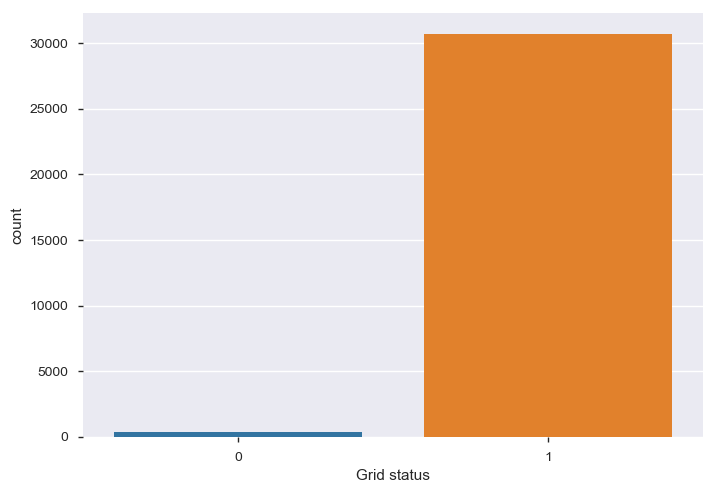

In [7]:
#Before me move towards corellation between SOC and Grid status, lets see the distribution of Grid Status
sns.countplot(x="Grid status", data=dataset)

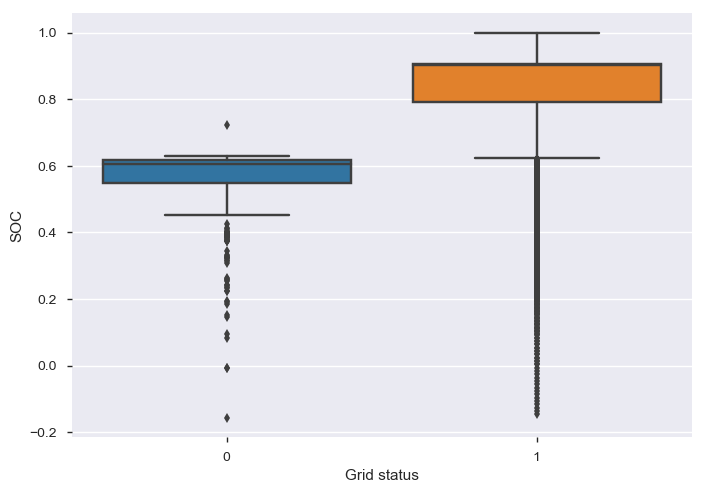

In [8]:
#Correlation between Grid Status and SOC
#The best way to check for correlation among different variables is by plotting graphs.

sns.boxplot( x=dataset["Grid status"], y=dataset["SOC"])

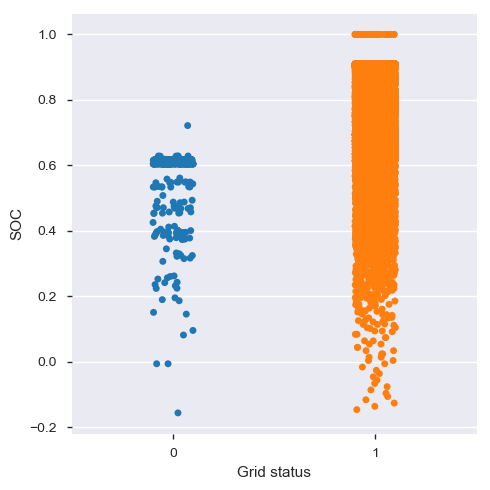

In [9]:
#This is another way to visualize the distribution among the two variables.
sns.catplot(x="Grid status", y="SOC", data=dataset);

C:\Users\syed.h\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


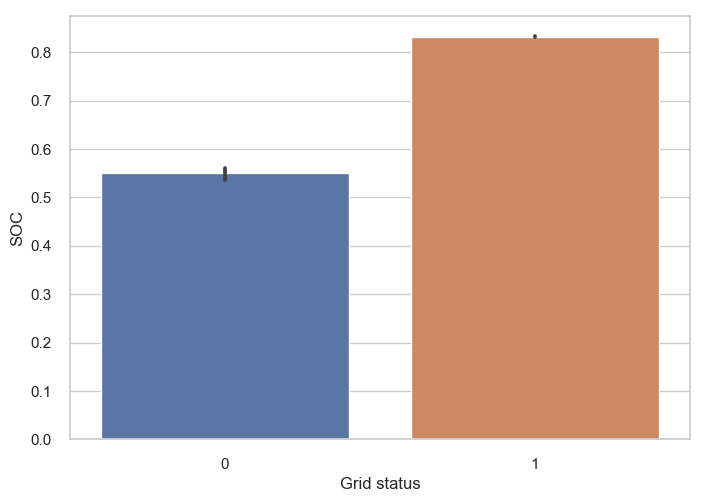

In [10]:
#Lastly, we can construct a bar plot
sns.set(style="whitegrid")
ax = sns.barplot(x="Grid status", y="SOC", data= dataset)

In [11]:
#Now that we have some rough idea about the correlation between the concerned variables, 
#lets go ahead and calculate the same.
dataset[['Grid status', 'SOC']].corr()

,Grid status,SOC
Grid status,1.000000,0.227947
SOC,0.227947,1.000000


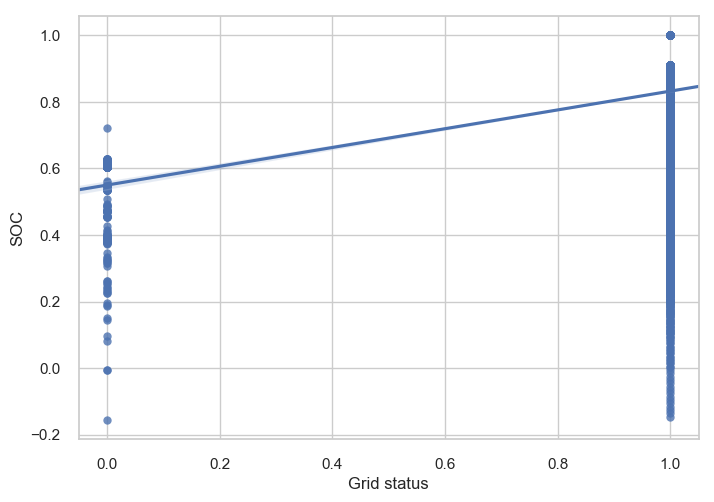

In [12]:
#This graph will help us get closer in understanding the correlation between Grid stats and SOC
sns.regplot(x=dataset["Grid status"], y=dataset["SOC"])

Text(0.5, 0, 'Equivalent Cycle')

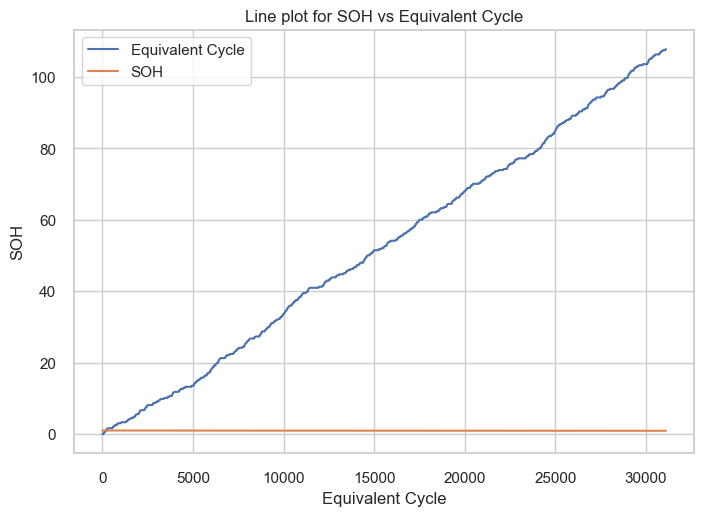

In [13]:
#Now lets find the correlation between SOH and Equivalent Cycle

x = dataset.index
a = dataset['Equivalent cycle']
b = dataset['SOH']

plt.title("Line plot for SOH vs Equivalent Cycle")
plt.plot(x,a, label='Equivalent Cycle')
plt.plot(x,b, label='SOH')
plt.legend(loc='upper left', frameon=True)
plt.ylabel('SOH')
plt.xlabel('Equivalent Cycle')

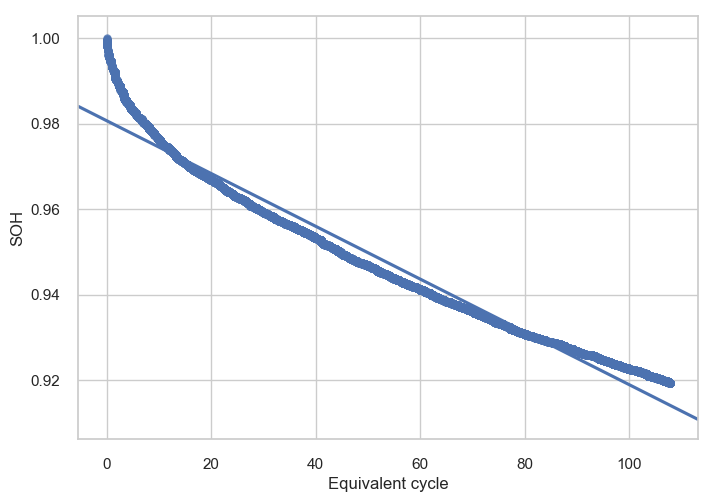

In [14]:
#One final plot to visualize the correlation.
sns.regplot(x=dataset["Equivalent cycle"], y=dataset["SOH"])

In [15]:
#Lets go ahead and calculate the correlation now.
dataset[['Equivalent cycle', 'SOH']].corr()

,Equivalent cycle,SOH
Equivalent cycle,1.000000,-0.984262
SOH,-0.984262,1.000000


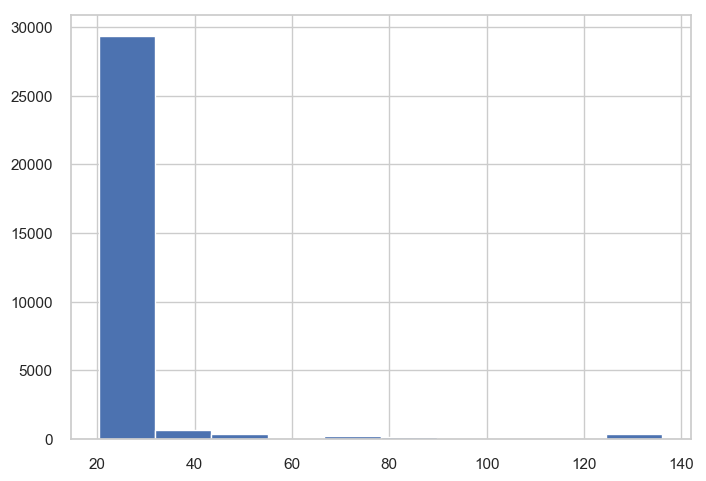

In [16]:
plt.hist(dataset['Temperature'])
plt.show()

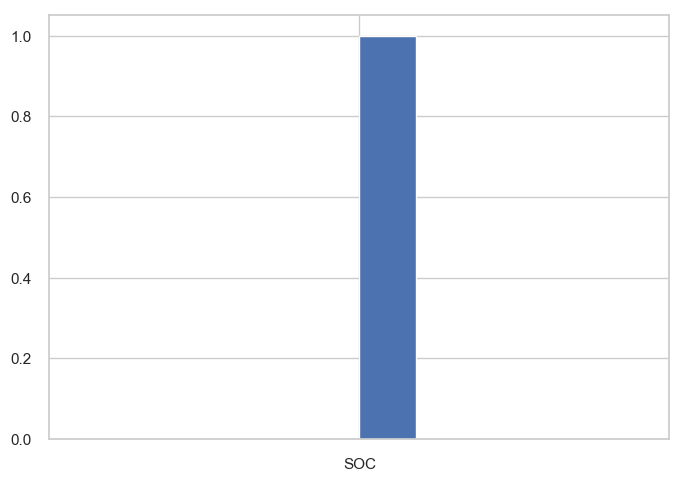

In [17]:
plt.hist('SOC')
plt.show()

In [18]:
dataset[['Temperature', 'SOC']].corr()

,Temperature,SOC
Temperature,1.00000,-0.36904
SOC,-0.36904,1.00000


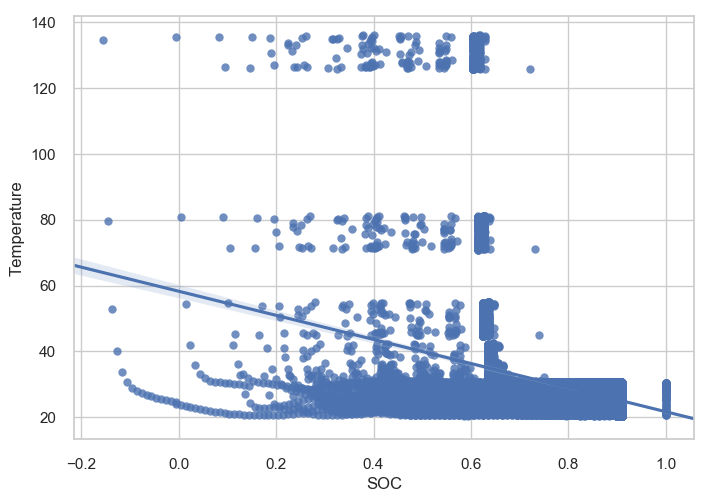

In [19]:
#Lets start with our final pair now.
sns.regplot(x=dataset["SOC"], y=dataset["Temperature"])

In [20]:
#Now lets find the correlation between SOH and Equivalent Cycle
dataset[['Temperature', 'SOC']].corr()

,Temperature,SOC
Temperature,1.00000,-0.36904
SOC,-0.36904,1.00000


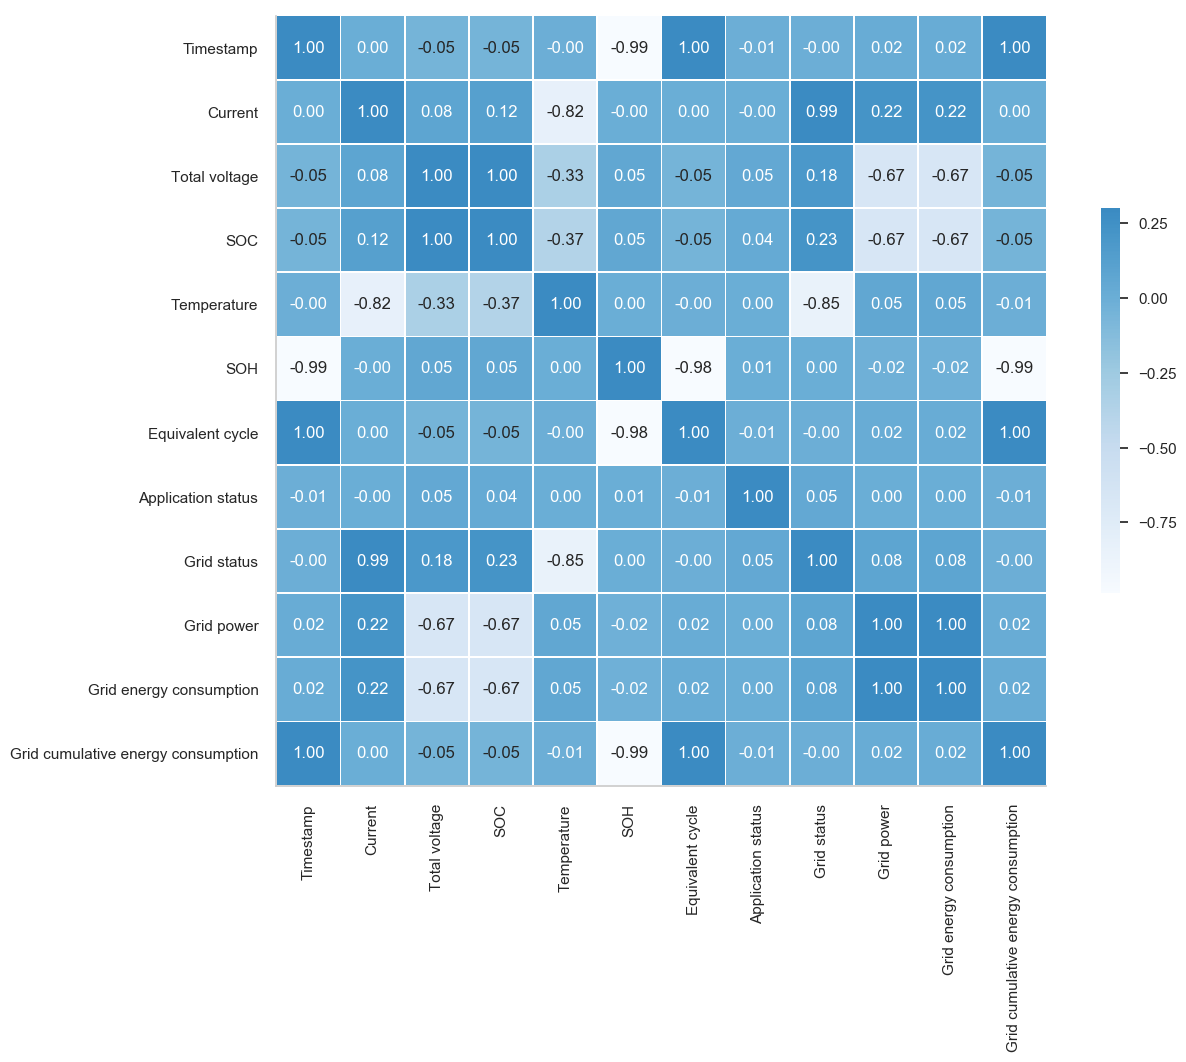

In [21]:
corr = dataset.corr()

g = sns.heatmap(corr,  vmax=.3, center=0,
        square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='Blues')
sns.despine()
g.figure.set_size_inches(14,10)

plt.show()


In [22]:
#Now, lets convert the unix time stamp into a normal date.
#We divide the time stamp by 1000 because it is given in milliseconds and python measures time in seconds.
def converttime(df):
    df = dt.datetime.fromtimestamp(df/1000).strftime('%Y-%m-%d %H:%M:%S')
    df = pd.to_datetime(df)
    return df
dataset['Timestamp'] = dataset['Timestamp'].apply(converttime)
dataset.set_index('Timestamp', inplace=True)

In [23]:
# Now, we have out timestamp column as an index as well as a human readable date. 
# This will help us immensely to perform time series analysis.

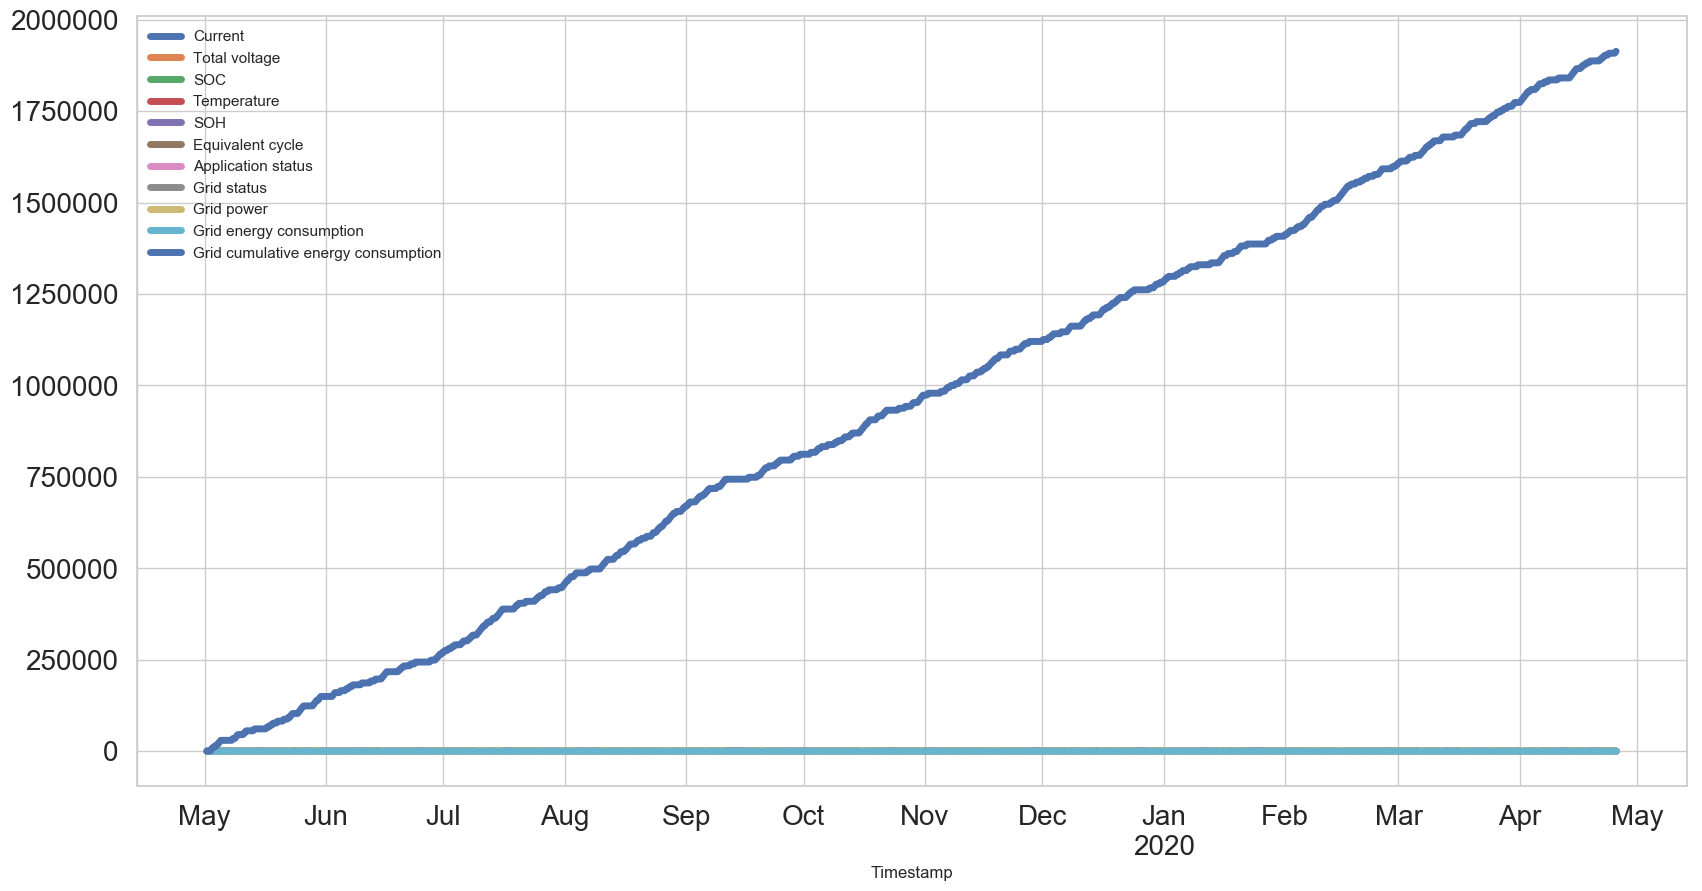

In [24]:
dataset.plot(figsize=(20,10), linewidth=5, fontsize=20)

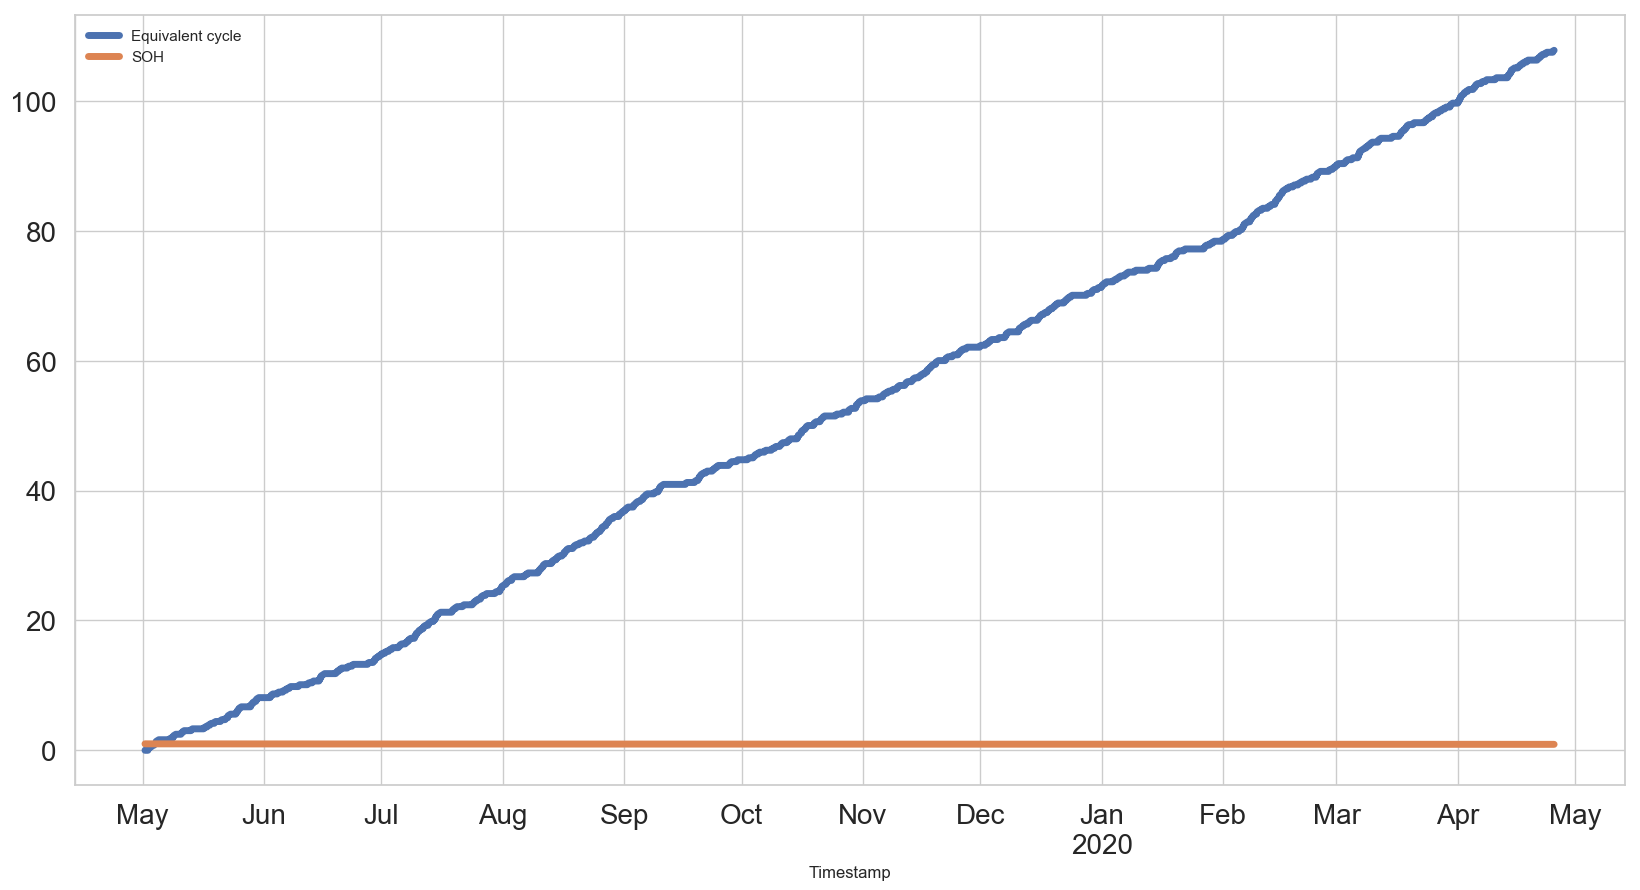

In [25]:
dataset[['Equivalent cycle', 'SOH']].plot(figsize=(20,10), linewidth=5, fontsize=20)


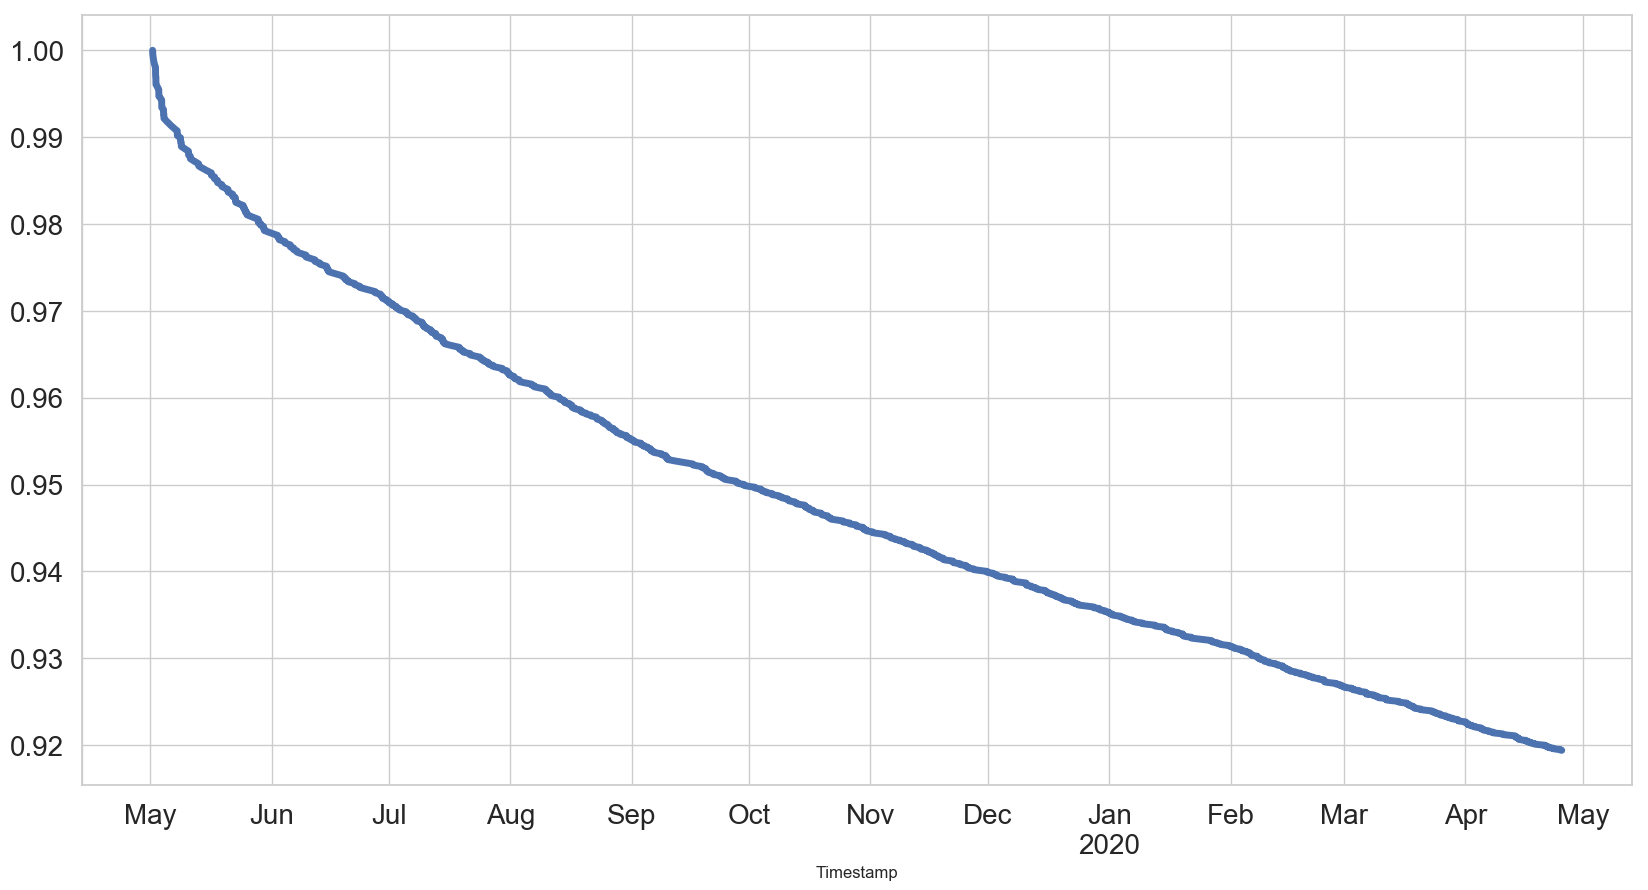

In [26]:
dataset['SOH'].plot(figsize=(20,10), linewidth=5, fontsize=20)